In [6]:
import numpy as np

# Task 2: Data Set
# Description: An array of possible binary inputs is defined as x. 
#              Moreover the targets, t, for the logical gates: and, or, not and, not or and exclusive or (xor) are defined.

x = np.array([[0,0],[0,1],[1,0],[1,1]]) 

t_and = np.array([0,0,0,1])
t_or = np.array([0,1,1,1])
t_nand = np.array([1,1,1,0])
t_nor = np.array([1,0,0,0])
t_xor = np.array([0,1,1,0])

In [7]:
# Task 3: Perceptron
# Description: The class Perceptron describes the behavior of a single neuron and includes:
#              @init variables: input_units
#              @class variables: -
#              @object variables: input_units, alpha, weights, bias
#              @functions: forward_step_drive, update

class Perceptron:
    def __init__(self, input_units):
        self.input_units = input_units
        self.alpha = 1      #learning rates
        self.weights = np.random.randn(self.input_units)
        self.bias = np.random.randn(1)
        self.data = []
    
    # Description: Calculates the output of the perceptron depending on the input, bias and weights.
    def forward_step_drive(self, data):
        self.data = data
        drive = self.weights @ self.data + self.bias
        return drive
    
    #Description: Updates the bias and weights depending on the calculated error.
    def update(self, delta):
        
        w_gradient = delta * self.data
        self.weights = self.weights - (self.alpha * np.transpose(w_gradient))
        
        b_gradient = delta * 1
        self.bias = self.bias - (self.alpha * b_gradient)

In [8]:
# Task 4: Multi-Layer Perceptron
# Description: The class MLP describes a multi-layer perceptron with one hiddenlayer including 4 perceptrons
#              and one output perceptron and includes:
#              @init variables: input_units
#              @class variables: -
#              @object variables: h1_1, h1_2, h1_3, h1_4, out_1
#              @functions: forward_step_out, backprop_step

class MLP:
    def __init__(self, input_units):
        
        # definition hidden layer 1
        self.h1_1 = {'Perceptron':Perceptron(input_units)}
        self.h1_2 = {'Perceptron':Perceptron(input_units)}
        self.h1_3 = {'Perceptron':Perceptron(input_units)}
        self.h1_4 = {'Perceptron':Perceptron(input_units)}
              
        # defintion ouput layer
        self.out_1 = {'Perceptron':Perceptron(4)}
    
    # Description: Calculates the output of the multi-layer perceptron (MLP), depending on the input and including perceptrons.
    def forward_step_out(self,data):
        self.h1_1.update({'drive':self.h1_1['Perceptron'].forward_step_drive(data)})  
        self.h1_2.update({'drive':self.h1_2['Perceptron'].forward_step_drive(data)})
        self.h1_3.update({'drive':self.h1_3['Perceptron'].forward_step_drive(data)})
        self.h1_4.update({'drive':self.h1_4['Perceptron'].forward_step_drive(data)})
        
        h1_out = [self.sigmoid(self.h1_1['drive']), self.sigmoid(self.h1_2['drive']), self.sigmoid(self.h1_3['drive']), self.sigmoid(self.h1_4['drive'])]
        
        self.out_1.update({'drive':self.out_1['Perceptron'].forward_step_drive(h1_out)})
        
        return self.sigmoid(self.out_1['drive'])
        
    # Description: Updates the weights and bias of all perceptrons in the multi-layer perceptron (MLP).
    def backprop_step(self, target):
                
        # Output Layer     
        delta = self.calc_delta(target, self.out_1['drive'])
        self.out_1['Perceptron'].update(delta)
        
        # Hidden Layer
        # Perceptron 1
        delta = self.calc_delta(target, self.h1_1['drive'])
        self.h1_1['Perceptron'].update(delta)
        
        # Perceptron 2
        delta = self.calc_delta(target, self.h1_2['drive'])
        self.h1_2['Perceptron'].update(delta)
        
        # Perceptron 3
        delta = self.calc_delta(target, self.h1_3['drive'])
        self.h1_3['Perceptron'].update(delta)
        
        # Perceptron 4
        delta = self.calc_delta(target, self.h1_4['drive'])
        self.h1_4['Perceptron'].update(delta)
        
 
    # Description: Trains the multi-layer perception.
    def training_step(self, input, target):      
        self.forward_step_out(input)
        self.backprop_step(target)

    # Description: Calculates the delta, representing the loss
    def calc_delta(self, target, drive):
        delta = (2 * (self.sigmoid(drive) - target)) * self.sigmoid_prime(drive)
        return delta
    
    # Description: Represents the activation function of the perceptron.
    def sigmoid(self, x): 
        return (1/(1+np.exp(-x)))
    
    # Description: Represents the derivative of the activation function of the perceptron.
    def sigmoid_prime(self, x):
        return (self.sigmoid(x) * (1 - self.sigmoid(x))) 

In [9]:
# Target from above
t = t_and

# Create the multi-layer perceptron
my_mlp = MLP(2)


# Define Training Loop

steps = []
accuracies = []

for i in range(1000):
    steps.append(i)
    
    #take a random sample from data, get corresponding t
    index = np.random.randint(4) #random number from 1, 2, 3 or 4
    data_input = x[index]   #random variablen paar aus x
    target = t[index]  #richtige Antwort zum Input

    my_mlp.training_step(data_input, target)
    
    # Performance of multi-layer perceptron
    accuracy_sum = 0
    for k in range(4):
        if my_mlp.forward_step_out(x[k]) > 0.5:
            output = 1
        else:
            output = 0
        accuracy_sum = accuracy_sum + int(output == t[k])

    accuracies.append(accuracy_sum/4)

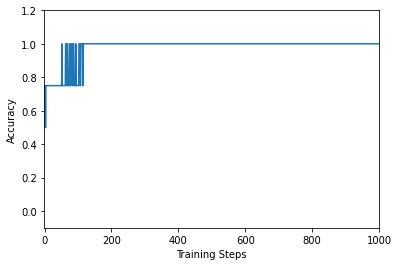

In [11]:
#visualize training
import matplotlib.pyplot as plt

plt.figure()
plt.plot(steps, accuracies)
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.xlim([-1,1000])
plt.ylim([-0.1, 1.2])
plt.show()